## Breast Cancer

In [8]:
from sklearn.datasets import load_breast_cancer  # dataset 불러오기
from sklearn.model_selection import train_test_split  # train 과 test 나누기

breast_cancer_data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=10)

### Decision Tree

In [5]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X_train, y_train)

print("훈련 데이터 점수:", round(tree_clf.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(tree_clf.score(X_test, y_test), 3))


훈련 데이터 점수: 0.963
테스트 데이터 점수: 0.939


### Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth=None)
RFC.fit(X_train,y_train)

print("훈련 데이터 점수:", round(RFC.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(RFC.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.974


### Gradient Boosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_depth=None)
GBC.fit(X_train,y_train)

print("훈련 데이터 점수:", round(GBC.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(GBC.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.921


### Xtra Gradient Boostingst

In [9]:
from xgboost import XGBClassifier

XGB = XGBClassifier(max_depth= 100, n_estimators= 100)
XGB.fit(X_train,y_train)

print("훈련 데이터 점수:", round(XGB.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(XGB.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.974


### 시각화

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

#랜덤포레스트의 특성 중요도를 feature_importance_values에 담는다
feature_importance_values = RFC.feature_importances_

# feature_importance_values 를 시리즈데이터로 올린다
feature_importance = pd.Series(feature_importance_values, index=breast_cancer_data.feature_names)

# feature_importance를 내림차순정렬하여 가장중요한 변수 5개를 추출한다
FI_top5 = feature_importance.sort_values(ascending=True)[:5]
print("Feature importance: \n",FI_top5)

Feature importance: 
 mean symmetry              0.002505
compactness error          0.003485
texture error              0.003693
fractal dimension error    0.004166
smoothness error           0.004168
dtype: float64


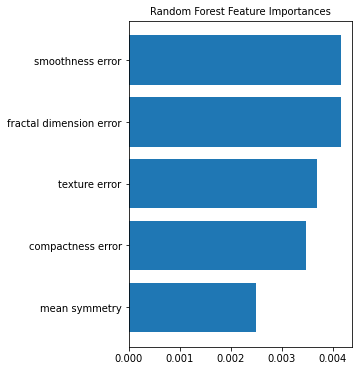

In [19]:
plt.figure(figsize=(4,6))
plt.title('Random Forest Feature Importances', fontsize=10)
plt.barh(np.arange(len(FI_top5)), FI_top5, align="center")
plt.yticks(np.arange(len(FI_top5)), FI_top5.index, fontsize=10)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

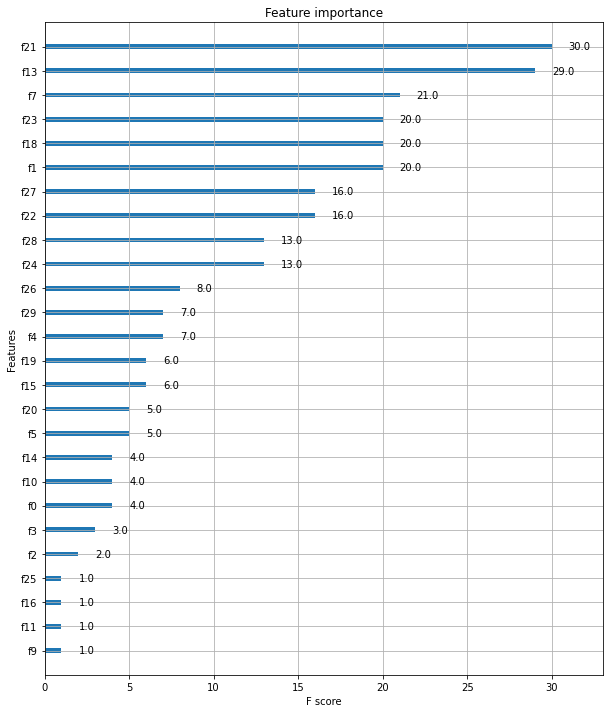

In [21]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(XGB, ax=ax)